<a href="https://colab.research.google.com/github/RohiniS12345/E-Commerce-Segmentation/blob/main/E_commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
The dataset contains details regarding the Invoice number,Stock code,description,Qunatity,Invoice date,Unit Price,CustomerID & Country

In [ ]:
Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

In [ ]:
Load and read the dataset

In [3]:

df=pd.read_csv("/data.csv",encoding="ISO-8859-1")
df.shape

(437460, 8)

In [4]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['InvoiceNo']=df['InvoiceNo'].astype(int)
#df["CustomerID"]=df["CustomerID"].astype(int)
#df["Quantity"]=df["Quantity"].astype(int)
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1368
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     108974
Country             1
dtype: int64

In [ ]:
With the enormous data available, it is impossible to impute values for the customerID. So deleting the missing values in customerID from the dataframe.

In [9]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)                              #dropping the missing values/rows from the CustomerID
df.shape

(328486, 8)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
Checking for duplicate entries and deleting them .

In [11]:
df['Country'].duplicated().value_counts()

True     328449
False        37
Name: Country, dtype: int64

In [12]:
df['InvoiceNo'].duplicated().value_counts()

True     310029
False     18457
Name: InvoiceNo, dtype: int64

In [13]:
df.duplicated().sum()

3646

In [14]:
df.drop_duplicates(inplace = True)
df.shape

(324840, 8)

In [ ]:
Doing NLP in the description colum

In [ ]:
--->removing spaces & number --->converting to small letters

In [15]:
df["Description"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
437453             PICNIC BASKET WICKER LARGE
437454        YELLOW GIANT GARDEN THERMOMETER
437455     SET/3 RED GINGHAM ROSE STORAGE BOX
437457            VINTAGE UNION JACK DOORSTOP
437458                RED SPOT GIFT BAG LARGE
Name: Description, Length: 324840, dtype: object

In [16]:
df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")
df["Desc_new"]=df["Desc_new"].astype(str)
df["Desc_new"]

<ipython-input-16-936880c981f7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")


0           WHITE  HANGING  HEART  T  LIGHT  HOLDER
1                             WHITE  METAL  LANTERN
2                CREAM  CUPID  HEARTS  COAT  HANGER
3          KNITTED  UNION  FLAG  HOT  WATER  BOTTLE
4               RED  WOOLLY  HOTTIE  WHITE  HEART  
                            ...                    
437453                PICNIC  BASKET  WICKER  LARGE
437454           YELLOW  GIANT  GARDEN  THERMOMETER
437455    SET      RED  GINGHAM  ROSE  STORAGE  BOX
437457               VINTAGE  UNION  JACK  DOORSTOP
437458                  RED  SPOT  GIFT  BAG  LARGE
Name: Desc_new, Length: 324840, dtype: object

In [17]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
437453             PICNIC BASKET WICKER LARGE
437454        YELLOW GIANT GARDEN THERMOMETER
437455       SET RED GINGHAM ROSE STORAGE BOX
437457            VINTAGE UNION JACK DOORSTOP
437458                RED SPOT GIFT BAG LARGE
Name: Desc_new, Length: 324840, dtype: object

In [18]:
df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
437453             picnic basket wicker large
437454        yellow giant garden thermometer
437455       set red gingham rose storage box
437457            vintage union jack doorstop
437458                red spot gift bag large
Name: Desc_new, Length: 324840, dtype: object

In [ ]:
Removing Stop words ,lemmatising

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
437453,574292,22501,PICNIC BASKET WICKER LARGE,1.0,2011-11-03 15:27:00,9.95,16914.0,United Kingdom,picnic basket wicker large
437454,574292,22928,YELLOW GIANT GARDEN THERMOMETER,1.0,2011-11-03 15:27:00,5.95,16914.0,United Kingdom,yellow giant garden thermometer
437455,574292,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1.0,2011-11-03 15:27:00,3.75,16914.0,United Kingdom,set red gingham rose storage box
437457,574292,21624,VINTAGE UNION JACK DOORSTOP,1.0,2011-11-03 15:27:00,5.95,16914.0,United Kingdom,vintage union jack doorstop


In [22]:
#Removing duplicated descriptions
df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
436448,strand glass necklace amethyst
436476,ruby glass cluster necklace
436482,classic diamante necklace jet
436484,diamante necklace black


In [28]:
#Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False)

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"]) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names_out()
df3=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [29]:
#shows the words in description colum
df3


,abc,abstract,acapulco,account,acrylic,address,ade,adult,advent,afghan,...,woven,wrap,wrapping,wreath,wrecking,writing,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
x=bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Using K-means clustering

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.

In [34]:
list_k=list(range(1,25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

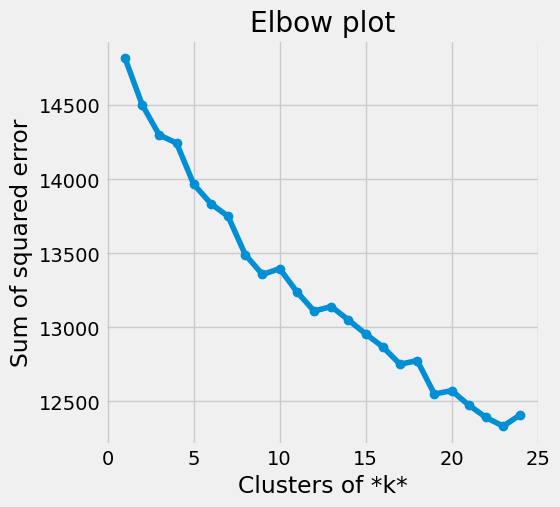

In [35]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [ ]:
Here we used Kmeans to find the optimal vlaue of K Since there is no optimal value that can be infered here with the elbow plot we will do PCA.(Principal Component Analysis)

In [36]:
sc=StandardScaler()                                                                 #performing standarisation
X_scaled= sc.fit_transform(x)

In [37]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = components)                                        #components is the number of reduced relevant columns (hyperparameter)
pca.fit(x)

PCA()

In [38]:
#prints the  variance
print("Variances(Percentage)")
print(pca.explained_variance_ratio_*100)

Variances(Percentage)
[2.22406981e+00 1.92171059e+00 1.71585098e+00 ... 1.04048312e-33
 9.96476422e-34 8.13197778e-34]


In [39]:
print ("cumulative variance (Percentage)")
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])

cumulative variance (Percentage)
[ 2.22406981  4.1457804   5.86163138  7.39785652  8.80482507 10.17108462
 11.4486445  12.58483958 13.66797225 14.70380636 15.70372214 16.63664066
 17.52801772 18.39696949 19.22190246 20.02276856 20.81905253 21.58895693
 22.35168518 23.09200239 23.81362814 24.5181683  25.19753471 25.8622841
 26.5179305  27.15693178 27.76746508 28.36487956 28.93628808 29.50001814
 30.05449438 30.59177868 31.11942339 31.63599142 32.14538606 32.65028684
 33.14452625 33.63381846 34.10376927 34.57125755 35.03284946 35.48354562
 35.93292025 36.37304044 36.80800184 37.23292114 37.64811307 38.05589153
 38.45742485 38.84990805 39.22726863 39.59395403 39.95040506 40.3005912
 40.64805455 40.98679731 41.32407518 41.65722077 41.98480877 42.30562174
 42.62367375 42.94093558 43.25567326 43.56278539 43.86364154 44.15822225
 44.45000272 44.73929867 45.02370676 45.30593206 45.58703324 45.86633182
 46.14243265 46.41213436 46.68054859 46.94576975 47.20843549 47.46957424
 47.72687777 47.9830

Text(0, 0.5, 'Explained variance(%)')

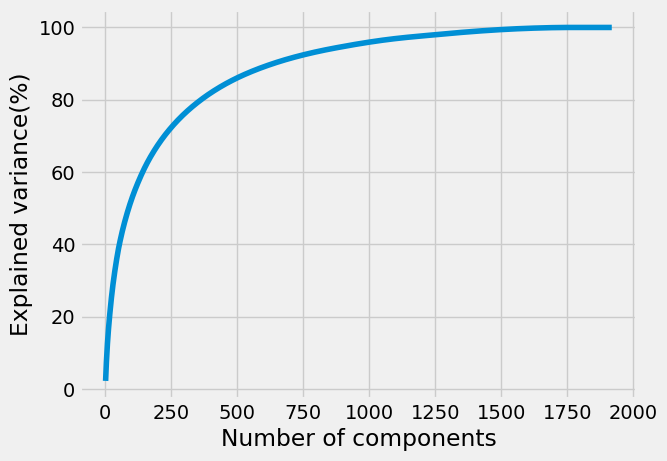

In [40]:
#plot the cumulative varience
components=len(pca.explained_variance_ratio_)\
  if components  is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")

Number of components: 635


Text(0, 0.5, 'Explained variance (%)')

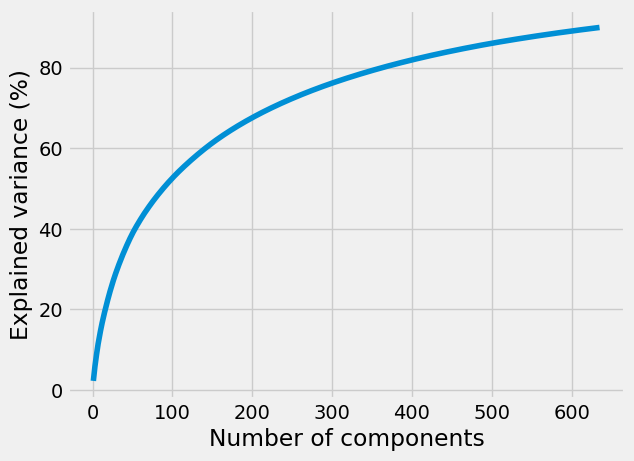

In [41]:
#From the above graph we can see that it takes 1500 components to reach flat curve(100% varience).
# choosing around  90% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
Applying PCA: PCA helps in lower dimension of data,while keeping all original variables in the model.

In [42]:
from sklearn.decomposition import PCA

pca=PCA(638)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

(3714, 638)

In [43]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

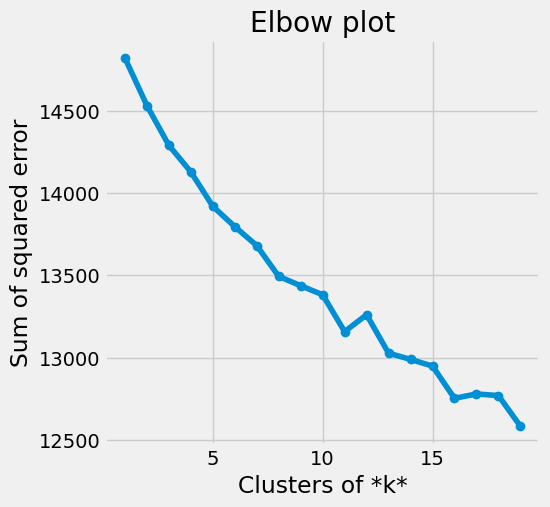

In [44]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [45]:
#km modelling
km=KMeans(n_clusters=12)         #applying k
km.fit(Principal_Component_Analysis )   #fit the data

centroids = km.cluster_centers_

In [46]:
#shows which group each datapoint belongs to
km.labels_

array([8, 7, 7, ..., 5, 5, 7], dtype=int32)

In [47]:
#Predicts the labels of cluster
label=km.fit_predict(Principal_Component_Analysis)
print(label)

[ 7  4 10 ...  5  5 10]


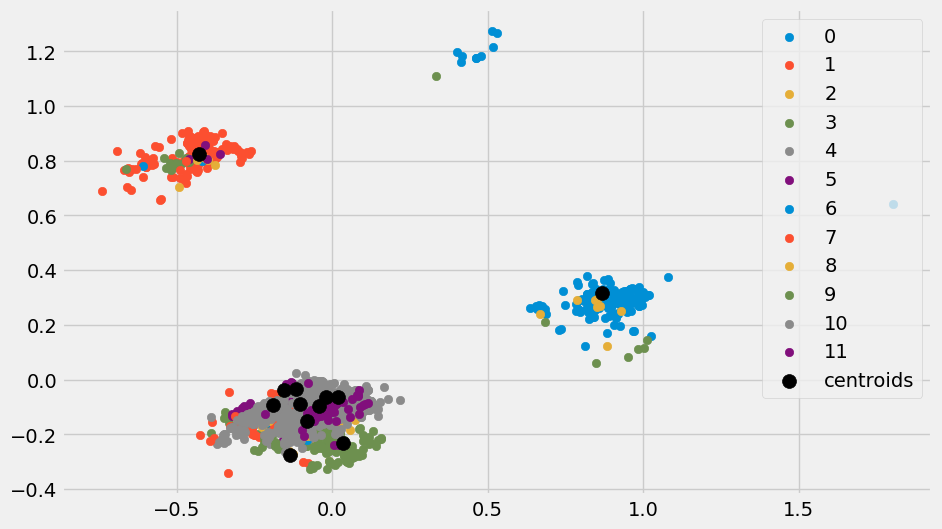

In [48]:
#Getting the centroids
centroids=km.cluster_centers_
llabels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in llabels:
  plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k",label="centroids")
plt.legend()
plt.show()

In [ ]:
Concatenating the label,NLP description into original dataframe

In [49]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5

(3714, 1)


,0
0,7
1,4
2,10
3,6
4,9
...,...
3709,3
3710,3
3711,5
3712,5


In [50]:
df2=df2.reset_index(drop=True)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
3709,strand glass necklace amethyst
3710,ruby glass cluster necklace
3711,classic diamante necklace jet
3712,diamante necklace black


In [51]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

,Desc_new,Product Code
0,white hanging heart light holder,7
1,white metal lantern,4
2,cream cupid hearts coat hanger,10


In [52]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,7
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,9
...,...,...,...,...,...,...,...,...,...,...
324835,574292,22501,PICNIC BASKET WICKER LARGE,1.0,2011-11-03 15:27:00,9.95,16914.0,United Kingdom,picnic basket wicker large,10
324836,574292,22928,YELLOW GIANT GARDEN THERMOMETER,1.0,2011-11-03 15:27:00,5.95,16914.0,United Kingdom,yellow giant garden thermometer,10
324837,574292,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1.0,2011-11-03 15:27:00,3.75,16914.0,United Kingdom,set red gingham rose storage box,8
324838,574292,21624,VINTAGE UNION JACK DOORSTOP,1.0,2011-11-03 15:27:00,5.95,16914.0,United Kingdom,vintage union jack doorstop,10


In [53]:
df9 = pd.get_dummies(df8,columns=["Product Code"])     ##product code one hot encoding
df9.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code_0,...,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,0,...,0,0,0,0,0,1,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,0,...,0,0,1,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,0,...,0,0,0,0,1,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:

df10 = df9.copy()      #copying df9

In [55]:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country","Desc_new"],axis=1)
df10.head()

,Quantity,UnitPrice,CustomerID,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,6.0,2.55,17850.0,0,0,0,0,0,0,0,1,0,0,0,0
1,6.0,3.39,17850.0,0,0,0,0,1,0,0,0,0,0,0,0
2,8.0,2.75,17850.0,0,0,0,0,0,0,0,0,0,0,1,0
3,6.0,3.39,17850.0,0,0,0,0,0,0,1,0,0,0,0,0
4,6.0,3.39,17850.0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
Grouping the Customers based on CustomerID:

In [56]:
df11 = df10.groupby(['CustomerID']).mean()
df11

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
CustomerID,,,,,,,,,,,,,,
12346.0,0.000000,1.040000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
12347.0,13.251462,2.734912,0.134503,0.064327,0.0,0.005848,0.011696,0.005848,0.000000,0.000000,0.029240,0.128655,0.584795,0.035088
12348.0,75.516129,5.764839,0.096774,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.548387,0.322581
12350.0,11.588235,3.841176,0.000000,0.058824,0.0,0.000000,0.176471,0.000000,0.000000,0.000000,0.058824,0.058824,0.647059,0.000000
12352.0,4.947368,23.274737,0.168421,0.126316,0.0,0.031579,0.042105,0.000000,0.000000,0.010526,0.052632,0.010526,0.557895,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,0.100000,0.000000,0.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.700000,0.000000
18281.0,7.714286,5.622857,0.285714,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000
18282.0,8.750000,4.895000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.000000


In [57]:
df11.describe()

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000
mean,19.441357,8.387573,0.106698,0.040059,0.003543,0.026866,0.029530,0.031305,0.017562,0.038112,0.042493,0.064233,0.570478,0.029120
std,98.636017,150.674501,0.103971,0.060080,0.024035,0.079802,0.062573,0.065783,0.058812,0.077351,0.065296,0.085079,0.167999,0.057074
min,-144.000000,0.122500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.512223,2.256839,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.496139,0.000000
50%,9.445195,3.002581,0.090909,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.005249,0.025641,0.045455,0.571429,0.000000
75%,14.023438,3.986387,0.153846,0.059284,0.000000,0.020970,0.035798,0.040706,0.008922,0.050000,0.062500,0.090909,0.658537,0.040000
max,4300.000000,8055.780000,1.000000,1.000000,0.636364,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Converting into numpy array:
y = df11.to_numpy()
y

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.32514620e+01, 2.73491228e+00, 1.34502924e-01, ...,
        1.28654971e-01, 5.84795322e-01, 3.50877193e-02],
       [7.55161290e+01, 5.76483871e+00, 9.67741935e-02, ...,
        3.22580645e-02, 5.48387097e-01, 3.22580645e-01],
       ...,
       [8.75000000e+00, 4.89500000e+00, 1.25000000e-01, ...,
        0.00000000e+00, 8.75000000e-01, 0.00000000e+00],
       [1.68831169e+00, 1.73439394e+00, 7.14285714e-02, ...,
        9.09090909e-02, 6.21212121e-01, 6.70995671e-02],
       [2.26571429e+01, 1.49357143e+00, 2.00000000e-01, ...,
        4.28571429e-02, 5.00000000e-01, 5.71428571e-02]])

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)


In [60]:
list_k=list(range(1,15))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y_scaled)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

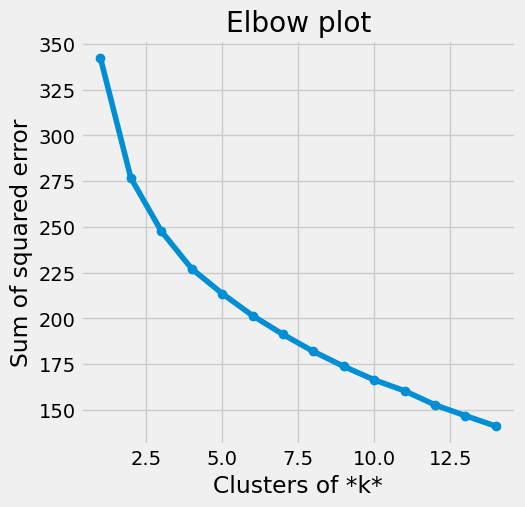

In [61]:
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [ ]:
From Elbow plot we can say that the optimal K value is at 4,thus the customers can be clusterd into 4 clusters based on their similarities

In [62]:
km = KMeans(n_clusters=4)     # applying k = 4
km.fit(y_scaled)          # fit the data

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)

inertia:  227.13221053946563


In [63]:
km.labels_

array([1, 3, 3, ..., 1, 3, 2], dtype=int32)

In [65]:
label = km.fit_predict(y_scaled)
print(label)

[0 3 3 ... 0 3 1]


In [ ]:
Visualizing the customer clusters:

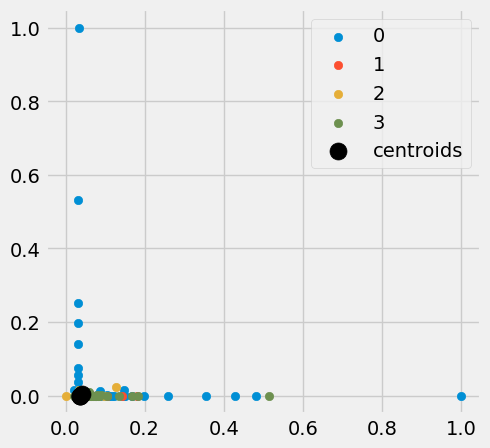

In [66]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

#  plotting
plt.figure(figsize=(5, 5))
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] ,  c="k", s=150, label="centroids")
plt.legend()
plt.show()

In [ ]:
Since the graph doesnt give a clear picture of the clusters formed ,we are converting the label to dataframe and assigne the respective labels to their clusters and plot them.

In [67]:
df13 = pd.DataFrame(label)
df13.head()

,0
0,0
1,3
2,3
3,3
4,3


In [68]:
df13.reset_index(level=0, inplace=True)                  #reseting  the index
df13.head()

,index,0
0,0,0
1,1,3
2,2,3
3,3,3
4,4,3


In [69]:
df13.rename(columns={'index':'ID', 0:'Customer cluster'},inplace=True)
df13.head()

,ID,Customer cluster
0,0,0
1,1,3
2,2,3
3,3,3
4,4,3


In [70]:
df14 = df13.groupby("Customer cluster").count()           #grouping the df based n the custmoer cluster and counting  customers belonging to each cluster
df14

,ID
Customer cluster,
0,724
1,699
2,292
3,2331


<Axes: ylabel='count'>

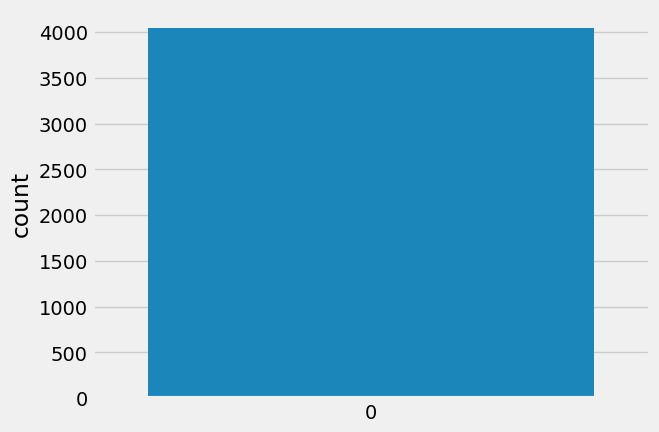

In [71]:
import seaborn as sns
sns.countplot(df13["Customer cluster"])